In [1]:
%matplotlib inline
import pandas as pd

### The Data

#### Loading mouse data

In [2]:
mouse_info = pd.read_csv('data/Mouse_metadata.csv')
mouse_info.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
Mouse ID        249 non-null object
Drug Regimen    249 non-null object
Sex             249 non-null object
Age_months      249 non-null int64
Weight (g)      249 non-null int64
dtypes: int64(2), object(3)
memory usage: 9.8+ KB


Checking if the mouse information DataFrame has any duplicates

In [4]:
mouse_info['Mouse ID'].duplicated().value_counts()

False    249
Name: Mouse ID, dtype: int64

#### Loading the study data

In [5]:
study_results = pd.read_csv('data/Study_results.csv')
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.2+ KB


In [7]:
study_results['Mouse ID'].value_counts().head()

g989    13
g296    10
c139    10
k483    10
s337    10
Name: Mouse ID, dtype: int64

In [8]:
len(study_results['Mouse ID'].value_counts())

249

Checking if there are duplicate rows based on Mouse ID and Timepoint columns

In [9]:
study_results.loc[study_results.duplicated(['Mouse ID', 
                                            'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


Creating a list of mice with duplicated data

In [10]:
duplicated_mice = list(study_results.loc[study_results.duplicated(['Mouse ID', 
                                            'Timepoint'])]['Mouse ID'].unique())

duplicated_mice

['g989']

Creating new DataFrame without the duplicated mice data

In [11]:
study_results_no_duplicate = study_results[~study_results['Mouse ID'].isin(duplicated_mice)]

study_results_no_duplicate.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [12]:
study_results_no_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1880 non-null object
Timepoint             1880 non-null int64
Tumor Volume (mm3)    1880 non-null float64
Metastatic Sites      1880 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 73.4+ KB


### Summary Statistics

In [13]:
combined_df = study_results_no_duplicate.merge(mouse_info, 
                                               on='Mouse ID', 
                                               how='left')

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


#### Manually calculating parameters and merging series into one DataFrame

In [14]:
stats_table_mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename("Mean")
stats_table_median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename("Median")
stats_table_var = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().rename("Var")
stats_table_std = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().rename("StD")
stats_table_sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().rename("SEM")

In [15]:
pd.concat([stats_table_mean, stats_table_median, stats_table_var, stats_table_std, stats_table_sem], axis=1)

,Mean,Median,Var,StD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


#### Using GroupBy

In [16]:
stats_table = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()

stats_table.columns = ['Drug Regimen','Mean', 'Median', 'Variance', 'StDev', 'SEM']

stats_table

,Drug Regimen,Mean,Median,Variance,StDev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


### Bar Plot

In [17]:
df_bars = combined_df.groupby(['Drug Regimen', 'Timepoint'])['Mouse ID'].agg(['count'])

df_bars.head(20)

count
Drug Regimen Timepoint       
Capomulin    0             25
             5             25
             10            25
             15            24
             20            23
             25            22
             30            22
             35            22
             40            21
             45            21
Ceftamin     0             25
             5             21
             10            20
             15            19
             20            18
             25            18
             30            16
             35            14
             40            14
             45            13

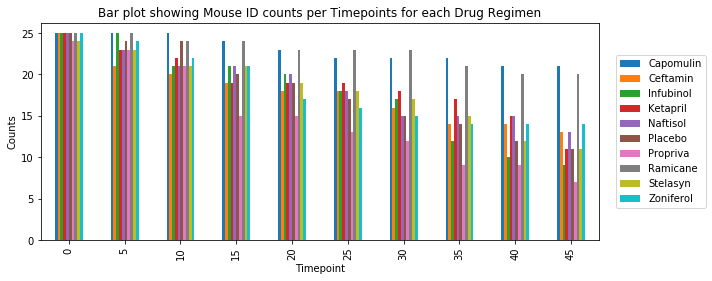

In [18]:
from matplotlib import cm
import matplotlib.pyplot as plt

cmap = cm.get_cmap('tab10')

ax = df_bars.unstack(0).plot(kind='bar', cmap=cmap, figsize=(10,4),
                            title="Bar plot showing Mouse ID counts per Timepoints for each Drug Regimen",
                            )


patches, labels = ax.get_legend_handles_labels()

label_list = []

for i in labels:
    label_list.append(i.split()[1][:-1])
    
#or
# label_list = [i.split()[1][:-1] for i in labels]
    
plt.xlabel('Timepoint')
plt.ylabel('Counts')
plt.legend(label_list, loc='right', bbox_to_anchor=(1.2, 0.5));

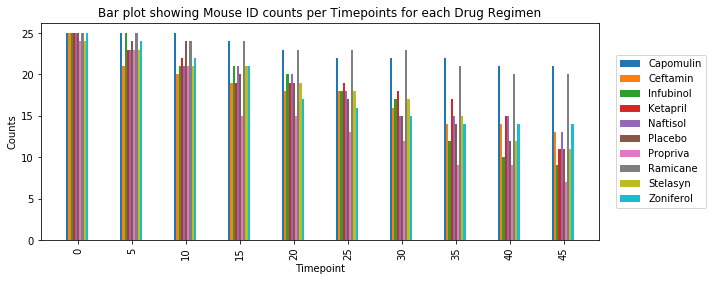

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))

column_list = list(df_bars.unstack(0).columns.levels[1])

cmap = cm.get_cmap('tab10')

bar_width = 0.2

for num, i in enumerate(column_list):
    ax.bar(df_bars.unstack(0).index + num * bar_width - len(df_bars.unstack(0).index) / 2 * bar_width, 
           df_bars.unstack(0)['count'][i], 
           bar_width, label=i, color=cmap(num))
    
        
plt.title('Bar plot showing Mouse ID counts per Timepoints for each Drug Regimen')
plt.xlabel('Timepoint')
plt.ylabel('Counts')

plt.xticks(df_bars.unstack(0).index, rotation='vertical')
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5));

### Gender Distribution

In [20]:
combined_df['Sex'].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

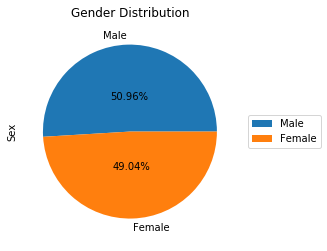

In [21]:
combined_df['Sex'].value_counts().plot(kind='pie', figsize=(10, 4),
                                       autopct='%1.2f%%', pctdistance=0.4, title="Gender Distribution")

plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5));

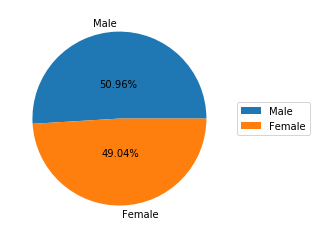

In [22]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.pie(combined_df['Sex'].value_counts(), labels=combined_df['Sex'].value_counts().index,
        autopct='%1.2f%%', pctdistance=0.4)

ax.set_title=("Gender Distribution")

plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5));

In [26]:
capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == "Capomulin"]

capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
224,j246,0,45.0,0,Capomulin,Female,21,21
225,r554,0,45.0,0,Capomulin,Female,8,17
226,s185,0,45.0,0,Capomulin,Female,3,17
227,b742,0,45.0,0,Capomulin,Male,7,21


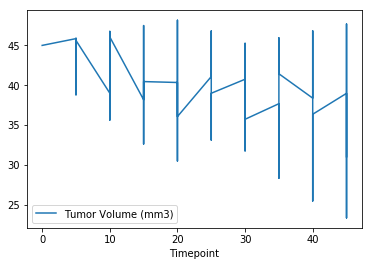

In [27]:
capomulin_df.plot(x='Timepoint', y='Tumor Volume (mm3)')

In [29]:
capomulin_df['Mouse ID'].value_counts()

b128    10
b742    10
u364    10
g316    10
l509    10
w914    10
t565    10
x401    10
m957    10
l897    10
s710    10
g288    10
v923    10
y793    10
s185    10
m601    10
j119    10
i557    10
r944    10
r554    10
i738    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

In [30]:
selected_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 'b128']
selected_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
468,b128,5,45.651331,0,Capomulin,Female,9,22
674,b128,10,43.270852,0,Capomulin,Female,9,22
713,b128,15,43.784893,0,Capomulin,Female,9,22
925,b128,20,42.731552,0,Capomulin,Female,9,22
1257,b128,25,43.262145,1,Capomulin,Female,9,22
1388,b128,30,40.605335,1,Capomulin,Female,9,22
1535,b128,35,37.967644,1,Capomulin,Female,9,22
1616,b128,40,38.379726,2,Capomulin,Female,9,22
1751,b128,45,38.982878,2,Capomulin,Female,9,22


(0, 50)

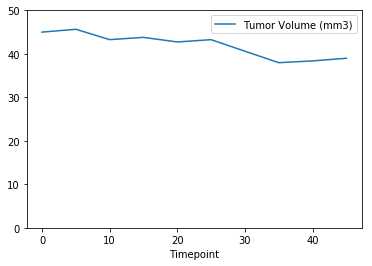

In [33]:
selected_mouse.plot(x='Timepoint', y='Tumor Volume (mm3)');
plt.ylim((0,50))

In [35]:
capoulin_mouse = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].agg('mean')

capoulin_mouse

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


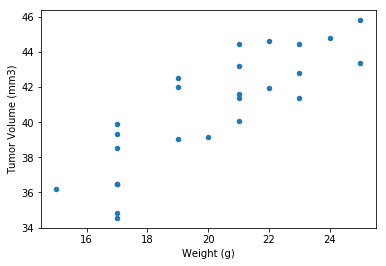

In [38]:
capoulin_mouse.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)');

In [40]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(capoulin_mouse['Weight (g)'], capoulin_mouse['Tumor Volume (mm3)'])
regress_values = capoulin_mouse['Weight (g)'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [43]:
line_eq

'y = 0.95x + 21.55'

In [44]:
regress_values

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64

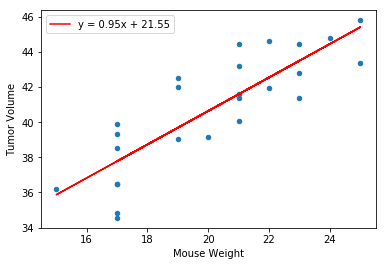

In [53]:
capoulin_mouse.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
plt.plot(capoulin_mouse['Weight (g)'],regress_values,"r-", label=line_eq)
plt.legend()
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume');